22. (Computer Experiment.) Suppose we flip a coin n times and let p denote
the probability of heads. Let X be the number of heads. We call X
a binomial random variable, which is discussed in the next chapter.
Intuition suggests that X will be close to n p. To see if this is true, we
can repeat this experiment many times and average the X values. Carry out a simulation and compare the average of the X’s to n p. Try this for
p = .3 and n = 10, n = 100, and n = 1, 000.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

p = 0.3  # Probability of heads
n_trials = 10000  # Number of trials

def binomial_simulation(n, p, n_trials):
    X = np.random.binomial(n, p, n_trials)  # Simulation of n_trials binomial experiments
    average_X = np.mean(X)  # calculated mean
    suggested_mean = n * p  # simulated mean
    return average_X, suggested_mean

# Simulation for n = 10, n = 100, n = 1000
results = {}
for n in [10, 100, 1000]:
    avg_X, suggested_mean = binomial_simulation(n, p, n_trials)
    results[n] = (avg_X, suggested_mean)

print(results)

{10: (2.9716, 3.0), 100: (30.073, 30.0), 1000: (300.1987, 300.0)}


Conclusion: Here we can see that the simulated averages of X are very close to the suggested values n⋅p, supporting the intuition, especially as n increases.

13. Let X ∼ N(0, 1) and let Y = e^X.

(a) Find the PDF for Y . Plot it.

(b) (Computer Experiment.) Generate a vector x = (x1,...,x10,000) consisting of 10,000 random standard Normals. Let y = (y1,...,y10,000)
where yi = e^(xi). Draw a histogram of y and compare it to the PDF you
found in part (a).

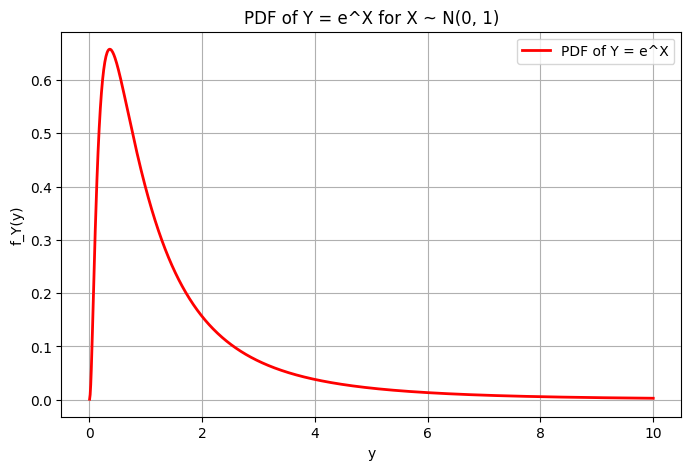

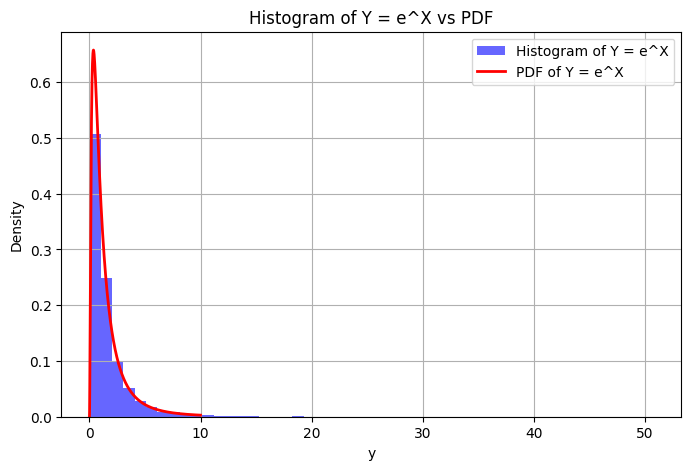

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part (a): e^X=Y => X=ln(Y); dx/dy = 1/y; PDF of X ~ N(0,1) -> fX(x) = 1 / (np.sqrt(2 * np.pi))) * np.exp(-x)**2 / 2;
# Final PDF of Y => f_Y = (1 / (y_vals_for_pdf * np.sqrt(2 * np.pi))) * np.exp(-(np.log(y_vals_for_pdf))**2 / 2)
y_vals_for_pdf = np.linspace(0.01, 10, 1000)
f_Y = (1 / (y_vals_for_pdf * np.sqrt(2 * np.pi))) * np.exp(-(np.log(y_vals_for_pdf))**2 / 2)  # PDF of Y

plt.figure(figsize=(8, 5))
plt.plot(y_vals_for_pdf, f_Y, label="PDF of Y = e^X", color='r', linewidth=2)
plt.title("PDF of Y = e^X for X ~ N(0, 1)")
plt.xlabel('y')
plt.ylabel('f_Y(y)')
plt.grid(True)
plt.legend()
plt.show()

# Part (b): Generation of 10,000 random normal variables and transforming them
np.random.seed(42)
x = np.random.normal(0, 1, 10000)
y = np.exp(x)

plt.figure(figsize=(8, 5))
plt.hist(y, bins=50, density=True, alpha=0.6, color='b', label="Histogram of Y = e^X")
plt.plot(y_vals_for_pdf, f_Y, label="PDF of Y = e^X", color='r', linewidth=2)
plt.title("Histogram of Y = e^X vs PDF")
plt.xlabel('y')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

Conclusion: In the second plot we see that the distribution (histogram) aligns well with the derived pdf.

18. Let X ∼ N(3, 16). Solve the following using the Normal table and using
a computer package.

(a) Find P(X < 7).

(b) Find P(X > −2).

(c) Find x such that P(X>x) = .05.

(d) Find P(0 ≤ X < 4).

(e) Find x such that P(|X| > |x|) = .05.

In [ ]:
from scipy.stats import norm

mean = 3  # mean
std_dev = 4  # standard deviation

# (a) P(X < 7)
z_a = (7 - mean) / std_dev
P_a = norm.cdf(z_a)

# (b) P(X > -2)
z_b = (-2 - mean) / std_dev
P_b = 1 - norm.cdf(z_b)

# (c) Find x such that P(X > x) = 0.05
P_c = 1 - 0.05  # P(X <= x) = 0.95
z_c = norm.ppf(P_c)
x_c = z_c * std_dev + mean

# (d) P(0 <= X < 4)
z_d1 = (0 - mean) / std_dev
z_d2 = (4 - mean) / std_dev
P_d = norm.cdf(z_d2) - norm.cdf(z_d1)

# (e) Find x such that P(|X| > |x|) = 0.05
P_tail = 1 - 0.05
z_e = norm.ppf(1 - 0.05 / 2)  # Two-tailed, so we divide by 2
x_e = z_e * std_dev + mean

print(f"Results:\n P(X < 7) = {P_a}\n P(X > -2) = {P_b}\n Find x such that P(X > x) = 0.05 => x = {x_c}\n P(0 <= X < 4) => {P_d}\n Find x such that P(|X| > |x|) = 0.05 => x = {x_e}")

Results:
 P(X < 7) = 0.8413447460685429
 P(X > -2) = 0.8943502263331446
 Find x such that P(X > x) = 0.05 => x = 9.57941450780589
 P(0 <= X < 4) => 0.3720789733060555
 Find x such that P(|X| > |x|) = 0.05 => x = 10.839855938160216
